[Reference](https://medium.com/@francescofranco_39234/classifying-imdb-sentiment-with-keras-embeddings-and-dropout-4b8827d4e2e6)

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense, Dropout, Conv1D, MaxPooling1D
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Model configuration
max_sequence_length = 100
num_distinct_words = 10000
embedding_output_dims = 15
loss_function = 'binary_crossentropy'
optimizer = 'adam'
additional_metrics = ['accuracy']
number_of_epochs = 2
verbosity_mode = True
validation_split = 0.20

In [3]:
# Load dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_distinct_words)
print(x_train.shape)
print(x_test.shape)

17464789/17464789 [==============================] - 0s 0us/step
(25000,)
(25000,)


In [4]:
# Pad all sequences
padded_inputs = pad_sequences(x_train, maxlen=max_sequence_length, value = 0.0) # 0.0 because it corresponds with <PAD>
padded_inputs_test = pad_sequences(x_test, maxlen=max_sequence_length, value = 0.0) # 0.0 because it corresponds with <PAD>

In [5]:
# Obtain 3 texts
for i in np.random.randint(0, len(padded_inputs), 3):
  INDEX_FROM=3   # word index offset
  word_to_id = imdb.get_word_index()
  word_to_id = {k:(v+INDEX_FROM) for k,v in word_to_id.items()}
  word_to_id["<PAD>"] = 0
  word_to_id["<START>"] = 1
  word_to_id["<UNK>"] = 2
  word_to_id["<UNUSED>"] = 3

  id_to_word = {value:key for key,value in word_to_id.items()}
  print('=================================================')
  print(f'Sample = {i} | Length = {len(padded_inputs[i])}')
  print('=================================================')
  print(' '.join(id_to_word[id] for id in padded_inputs[i] ))

1641221/1641221 [==============================] - 0s 0us/step
Sample = 17366 | Length = 100
with an abusive father the father seems to favor ashley so laura gets the blame for everything there is a promise made that the girls would never be apart but as they grow up their lives go in different directions ashley gets a job in a diner where she meets barry a married man of course no good can come of this the fact that barry had <UNK> was a poor excuse for a way to track him down i kept waiting for this movie to get better and for there to be some resolution somewhere but it never happened
Sample = 23588 | Length = 100
so heart gripping not because the hero <UNK> any heroic deeds but his <UNK> and <UNK> urge to realize his dream which make us wonder and envy unlike <UNK> or other sarcastic <UNK> this show <UNK> us and teaches us something homer and <UNK> both have the dream and they do what they can despite other <UNK> opinions i recommend other imdb users to see the japanese tv series i

In [6]:
# Define the Keras model
model = Sequential()
model.add(Embedding(num_distinct_words, embedding_output_dims, input_length=max_sequence_length))
model.add(Dropout(0.50))
model.add(Conv1D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(Dropout(0.50))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dropout(0.50))
model.add(Dense(1, activation='sigmoid'))

In [7]:
# Compile the model
model.compile(optimizer=optimizer, loss=loss_function, metrics=additional_metrics)

# Give a summary
model.summary()

# Train the model
history = model.fit(padded_inputs, y_train, epochs=number_of_epochs, verbose=verbosity_mode, validation_split=validation_split)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 15)           150000    
                                                                 
 dropout (Dropout)           (None, 100, 15)           0         
                                                                 
 conv1d (Conv1D)             (None, 100, 32)           992       
                                                                 
 dropout_1 (Dropout)         (None, 100, 32)           0         
                                                                 
 max_pooling1d (MaxPooling1  (None, 50, 32)            0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                        

In [8]:
# Compile the model
model.compile(optimizer=optimizer, loss=loss_function, metrics=additional_metrics)

# Give a summary
model.summary()

# Train the model
history = model.fit(padded_inputs, y_train, epochs=number_of_epochs, verbose=verbosity_mode, validation_split=validation_split)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 15)           150000    
                                                                 
 dropout (Dropout)           (None, 100, 15)           0         
                                                                 
 conv1d (Conv1D)             (None, 100, 32)           992       
                                                                 
 dropout_1 (Dropout)         (None, 100, 32)           0         
                                                                 
 max_pooling1d (MaxPooling1  (None, 50, 32)            0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                        

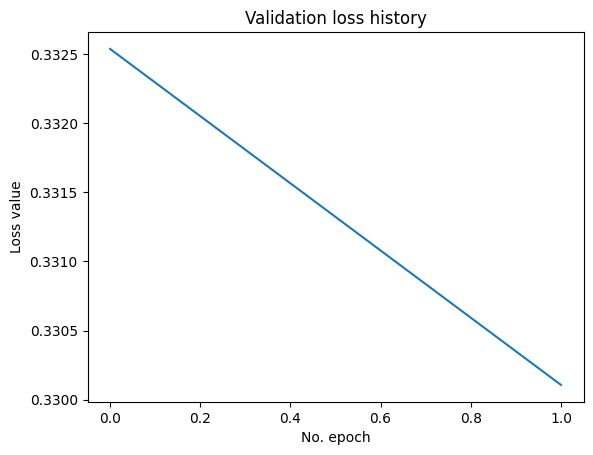

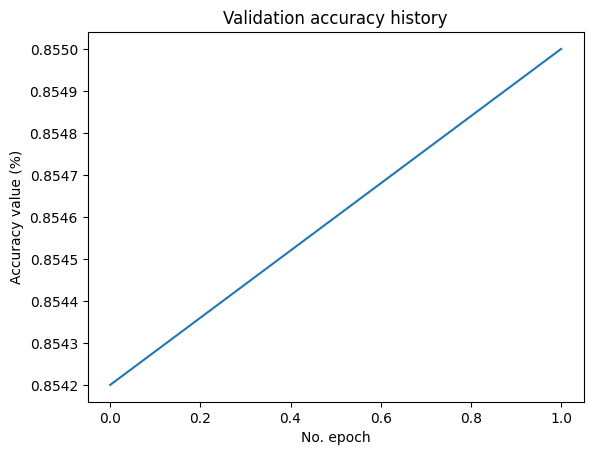

In [9]:
# Visualize history
# Plot history: Validation loss
plt.plot(history.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Plot history: Accuracy
plt.plot(history.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

In [10]:
# Texts
text_bad = x_train[7737]
text_good = x_train[449]
texts = (text_bad, text_good)
padded_texts = pad_sequences(texts, maxlen=max_sequence_length, value = 0.0) # 0.0 because it corresponds with <PAD>

# Generate predictions
predictions = model.predict(padded_texts)
print(predictions)

1/1 [==============================] - 0s 308ms/step
[[0.01204949]
 [0.9330113 ]]
